# Praktiki Çalışma: Şəxs adlarının sayının cinslər və milli mənşəylilik baxımından dəyərləndirilməsi
&emsp;&emsp;Ahəng qanunu ilə işləməyimin əsas səbəbi onun bir ifadə ilə desək, “Türk dillərinin dəmir qanunu” olaraq görülməsidir. Sözün mənşəyi baxımından ahəng qanuna tabe olması onun milli bir mənşəyə sahib olması və ya alınma olmadığını göstərə bilər. (Təbii ki, bu da sözün alınma olub olmaması ilə bağlı göstəricilərdən sadəcə biridir. #Filoloqlar və #linqivistiklər istəsələr bu yazını məndən alıb bir məqalə kimi genişləndirə üzərində çalışa bilərlər. Mən sadəcə bunun üzərində həvəskar bir çalışma aparmışam.) Beləliklə, sözün alınma olub-olmamasını geri qaytaran bir funksiya yazdım və data prepearing, cleaning, -ə başladım. Nəticədə 11 025 ədəd ad alındığını gördüm və bunun az ola biləcəyini düşünərək əlavə araşdırmağa ehtiyac olduğunu anladım. Beləliklə, lüğətin üzərində çalışaraq mətndən adları çıxardım və onları sortlaşdırıb duplikat-təkrarlanan adları çıxardaraq data -nı emal etdim. 16 233 ad ilə yekunlaşdırdım. Cinslər üzrə və ümumi olaraq adların ahəng qanuna tabe olub olmamasını öncəki hissədə qeyd etdiyim legend parametrlərini bu hissədə vizuallaşdıraraq praktiki cəhətdən ifadə etdim.<br>&emsp;&emsp;İndi isə data ilə işləmək üçün gərəkli kitabxanaları daxil edək:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df_file_read_excel = "/content/Names Final.xlsx"
df_file_read = pd.read_excel(io=df_file_read_excel, sheet_name="YekunData", 
                             index_col="Hərflər")
df = pd.DataFrame(data=df_file_read)

In [ ]:
df

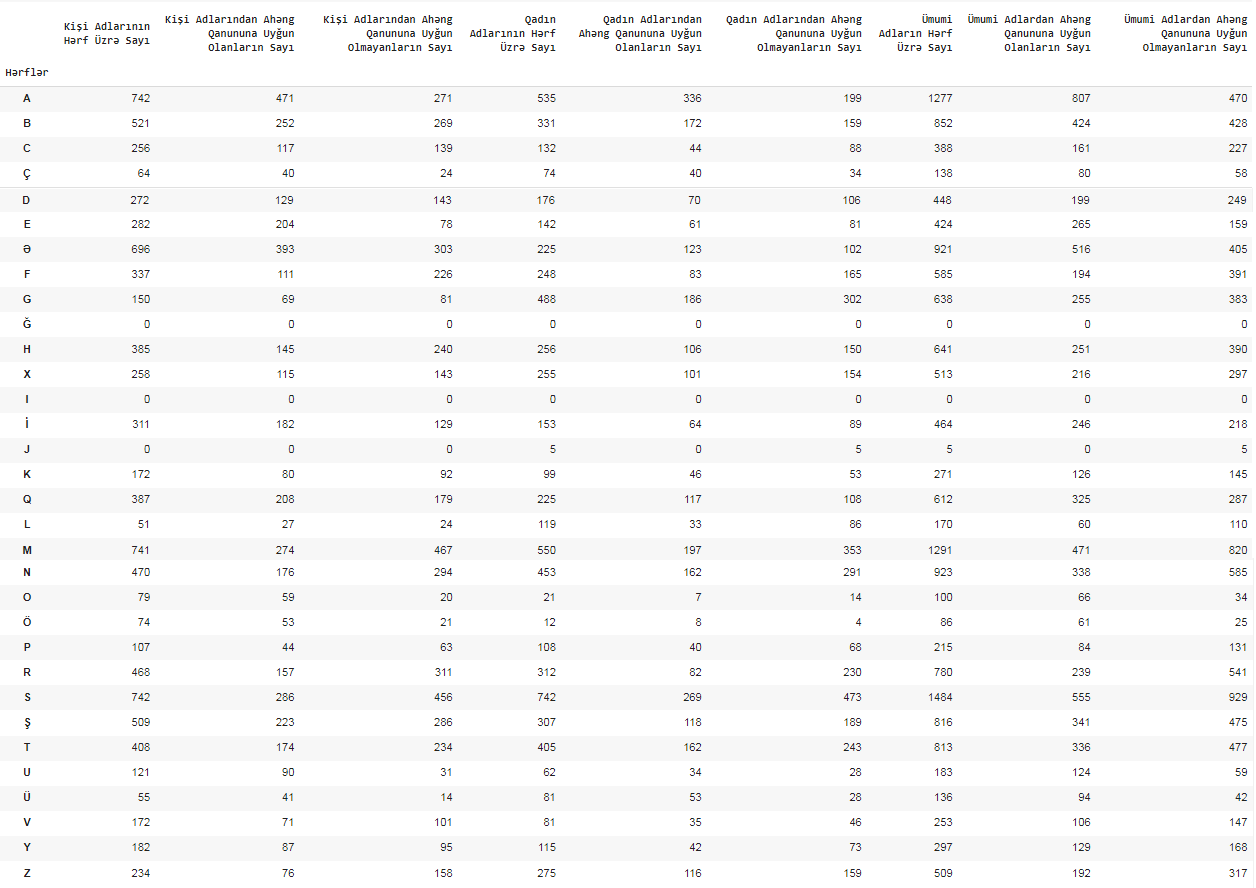

<br><br><br><br><br>

In [2]:
def pti (pti_X, pti_Y):
  '''
  İki ədəd pixel dəyər alar və onları
  inç uzunluq vahidinə çevirib geri qaytarar
  '''
  x_Res = pti_X*0.010417
  y_Res = pti_Y*0.010417
  return x_Res, y_Res
def to_annotate_inside(x_cor, y_cor):
  label = f"{y_cor}"
  return plt.annotate(label, # annotasiya etdiyimiz mətn 
                      (x_cor,y_cor), # annotasiya mətninin yerləşəcəyi mövqe 
                      #koordinatlar 
                      textcoords="offset points", # mətnin necə yerləşəcəyi 
                      xytext=(0,10), # mətnin nöqtədən uzaqlığı (x,y) 
                      ha='center') # mətnin yerləşmə qaydası  
                      #left, right və ya center ola bilər
def to_annotate(x_cor_list, y_cor_list):
  # zip x və y koordinatlarını cütləyərək birləşdirər
  for x,y in zip(x_cor_list, y_cor_list):
    to_annotate_inside(x, y)

<br><br><br>

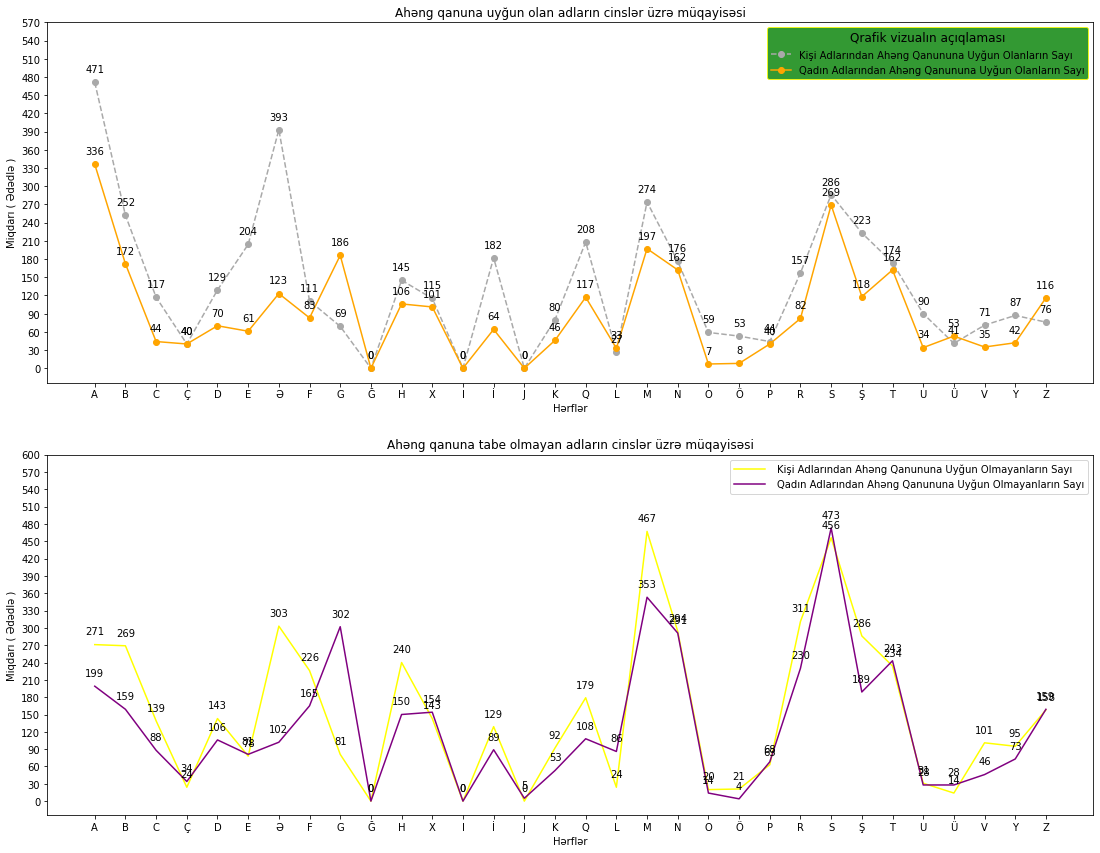

In [92]:
from pandas.core.frame import fmt
plt.figure(figsize=pti(1800,1200))

plt.subplot(2,1,1)
plt.title(label='Ahəng qanuna uyğun olan adların cinslər üzrə müqayisəsi', 
          loc='center')
plt.plot(df.index, 'Kişi Adlarından Ahəng Qanununa Uyğun Olanların Sayı', 
         color='darkgrey',linestyle='--', marker='o',data=df)
to_annotate(df.index, df['Kişi Adlarından Ahəng Qanununa Uyğun Olanların Sayı'])
plt.plot(df.index, 'Qadın Adlarından Ahəng Qanununa Uyğun Olanların Sayı', 
         linestyle='-', marker='o', data=df, color = 'orange')
to_annotate(df.index, df['Qadın Adlarından Ahəng Qanununa Uyğun Olanların Sayı'])
plt.xlabel(xlabel='Hərflər', loc='center')
plt.ylabel(ylabel= 'Miqdarı ( Ədədlə )', loc='center')
plt.yticks(range(0,600,30))
plt.legend(facecolor='green', edgecolor="yellow",title_fontsize=12,mode=None,
           title="Qrafik vizualın açıqlaması")
plt.subplots_adjust(bottom=-0.0005)

plt.subplot(2,1,2)
plt.title(label='Ahəng qanuna tabe olmayan adların cinslər üzrə müqayisəsi', 
          loc='center')
plt.plot(df.index, 'Kişi Adlarından Ahəng Qanununa Uyğun Olmayanların Sayı', 
         color="yellow",data=df)
to_annotate(df.index, df['Kişi Adlarından Ahəng Qanununa Uyğun Olmayanların Sayı'])
plt.plot(df.index, 'Qadın Adlarından Ahəng Qanununa Uyğun Olmayanların Sayı', 
         data=df, color = 'purple')
to_annotate(df.index, df['Qadın Adlarından Ahəng Qanununa Uyğun Olmayanların Sayı'])
plt.xlabel(xlabel='Hərflər', loc='center')
plt.ylabel(ylabel= 'Miqdarı ( Ədədlə )', loc='center')
plt.yticks(range(0,630,30))
plt.legend(borderpad=0.4, handlelength=3.1, handletextpad=1.2)
plt.subplots_adjust(bottom=-0.0005)

plt.show()

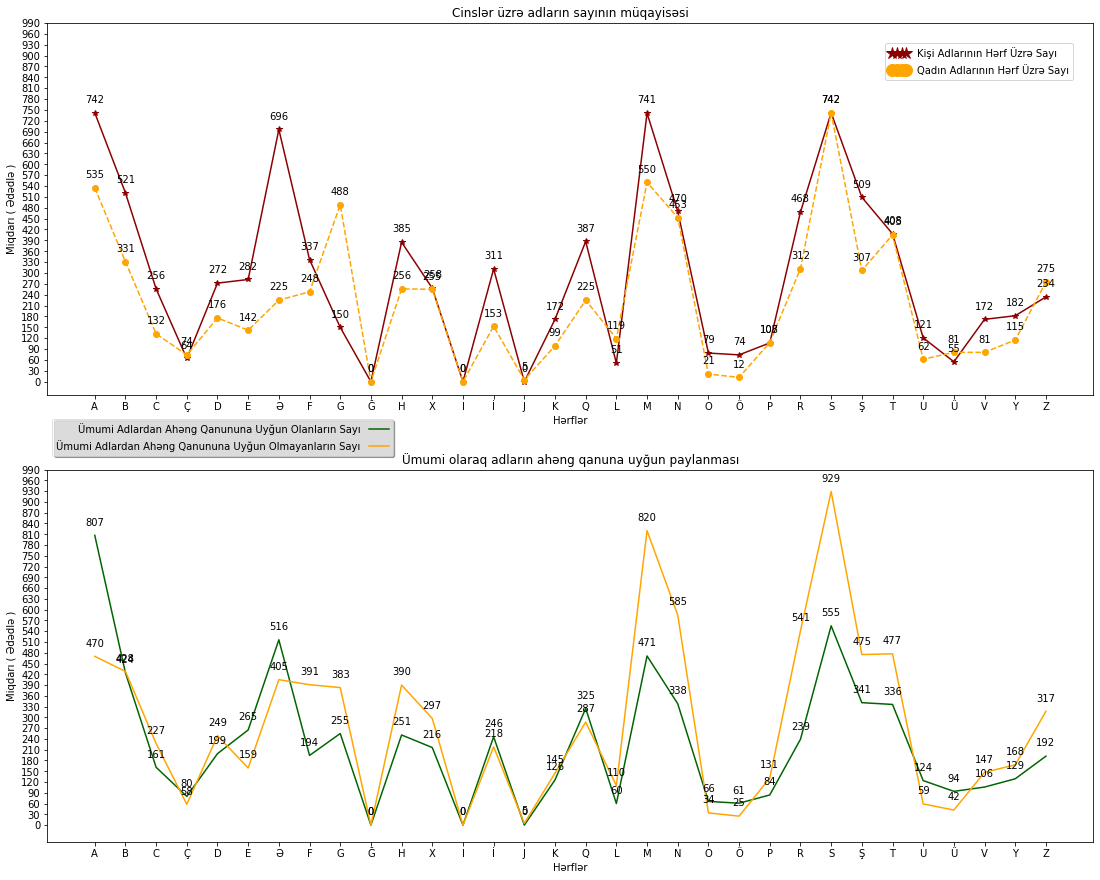

In [94]:



from pandas.core.frame import fmt
plt.figure(figsize=pti(1800,1240))

plt.subplot(2,1,1)
plt.title(label='Cinslər üzrə adların sayının müqayisəsi', loc='center')
plt.plot(df.index, 'Kişi Adlarının Hərf Üzrə Sayı',"-*", color="darkred",
         data=df)
to_annotate(df.index, df["Kişi Adlarının Hərf Üzrə Sayı"])
plt.plot(df.index, 'Qadın Adlarının Hərf Üzrə Sayı', "o--", color = 'orange', 
         data=df)
to_annotate(df.index, df['Qadın Adlarının Hərf Üzrə Sayı'])
plt.xlabel(xlabel='Hərflər', loc='center')
plt.ylabel(ylabel= 'Miqdarı ( Ədədlə )', loc='center')
plt.yticks(range(0,1000,30))
plt.legend(loc=1,fontsize="medium",numpoints=4,markerscale=2, borderaxespad=2)
plt.subplots_adjust(bottom=-0.0005)

plt.subplot(2,1,2)
plt.title(label='Ümumi olaraq adların ahəng qanuna uyğun paylanması', 
          loc='center')
plt.plot(df.index, 'Ümumi Adlardan Ahəng Qanununa Uyğun Olanların Sayı',
         color="darkgreen", data=df)
to_annotate(df.index, df['Ümumi Adlardan Ahəng Qanununa Uyğun Olanların Sayı'])
plt.plot(df.index, 'Ümumi Adlardan Ahəng Qanununa Uyğun Olmayanların Sayı', 
         data=df, color = 'orange')
to_annotate(df.index, df['Ümumi Adlardan Ahəng Qanununa Uyğun Olmayanların Sayı'])
plt.xlabel(xlabel='Hərflər', loc='center')
plt.ylabel(ylabel= 'Miqdarı ( Ədədlə )', loc='center')
plt.yticks(range(0,1000,30))
plt.legend(bbox_to_anchor= (0.335, 1.15, 0., 0.), markerfirst=False,
           shadow=True, framealpha=0.6)
plt.subplots_adjust(bottom=-0.0005)

plt.show()

<br>

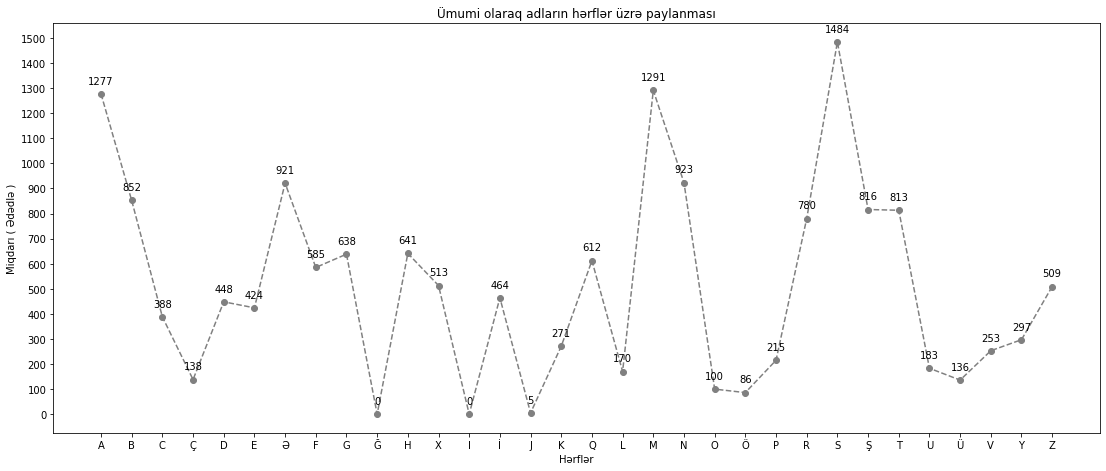

In [96]:



from pandas.core.frame import fmt
plt.figure(figsize=pti(1800,620))

plt.subplot(1,1,1)
plt.title(label='Ümumi olaraq adların hərflər üzrə paylanması', loc='center')
plt.plot(df.index, 'Ümumi Adların Hərf Üzrə Sayı', 
         color='grey',linestyle='--', marker='o',data=df)
to_annotate(df.index, df['Ümumi Adların Hərf Üzrə Sayı'])
plt.xlabel(xlabel='Hərflər', loc='center')
plt.ylabel(ylabel= 'Miqdarı ( Ədədlə )', loc='center')
plt.yticks(range(0,1600,100))
plt.subplots_adjust(bottom=-0.0005)

plt.show()

<table border="1">
<thead>
<tr><th>Çıxarılan nəticələr üzrə göstəricilər </th></tr>
</thead>
<tbody>
<tr><td>Kişi Adlarının sayı 9246 -dır.</td></tr>
<tr><td>Kişi Adlarından Ahəng Qanununa Uyğun Olanların Sayı 4354 -dür.</td></tr>
<tr><td>Kişi Adlarından Ahəng Qanununa Uyğun Olmayanların Sayı 4892 -dir.</td></tr>
<tr><td>Qadın Adları sayı 6987 -dir.</td></tr>
<tr><td>Qadın Adlarından Ahəng Qanununa Uyğun Olanların Sayı 2907 -dir.</td></tr>
<tr><td>Qadın Adlarından Ahəng Qanununa Uyğun Olmayanların Sayı 4080 -dir.</td></tr>
<tr><td>Ümumi Adların Hərf Üzrə Sayı 16233 -dür.</td></tr>
<tr><td>Ahəng Qanununa Uyğun Olan adların sayı 7261 -dir.</td></tr>
<tr><td>Ahəng Qanununa Uyğun Olmayan adların Sayı 8972 -dir.</td></tr>
<tr><td>Qadın Adlarında Ahəng Qanununa Uyğun olanlarda maksimum sayda ad A hərfində yerləşməklə miqdarı 336 -dır.</td></tr>
<tr><td>Kişi adlarında Ahəng Qanununa Uyğun olanlarda maksimum sayda ad A hərfində yerləşməklə miqdarı 471 -dir.</td></tr>
<tr><td>Qadın Adlarında Ahəng Qanununa Uyğun olmayanların maksimum sayda ad S hərfində yerləşməklə miqdarı 473 -dür.</td></tr>
<tr><td>Kişi adlarında Ahəng Qanununa Uyğun olmayanların maksimum sayda ad M hərfində yerləşməklə miqdarı 467 -dir.</td></tr>
<tr><td>Qadın Adlarında Hərflər üzrə Adların ən maksimumu sayda ad S hərfində yerləşməklə miqdarı 742 -dir.</td></tr>
<tr><td>Kişi adlarında Hərflər üzrə Adların ən maksimumu sayda ad A hərfində yerləşməklə miqdarı 742 -dir.</td></tr>
<tr><td>Qadın Adlarında Ahəng Qanununa Uyğun olanlarda minumum sayda ad O hərfində yerləşməklə miqdarı 7 -dir.</td></tr>
<tr><td>Kişi adlarında Ahəng Qanununa Uyğun olanlarda minumum sayda ad L hərfində yerləşməklə miqdarı 27 -dir.</td></tr>
<tr><td>Qadın Adlarında Ahəng Qanununa Uyğun olmayanların minimumu sayda ad Ö hərfində yerləşməklə miqdarı 4 -dür.</td></tr>
<tr><td>Kişi adlarında Ahəng Qanununa Uyğun olmayanların minimum sayda ad Ü hərfində yerləşməklə miqdarı 14 -dür.</td></tr>
<tr><td>Qadın Adlarında Hərflər üzrə Adların ən minimum sayda ad Ö hərfində yerləşməklə miqdarı 12 -dir.</td></tr>
<tr><td>Kişi adlarında Hərflər üzrə Adların ən minimum sayda ad L hərfində yerləşməklə miqdarı 51 -dir.</td></tr>
</tbody>
</table><br><br>
<p align="center">Yazar: <a href="https://www.linkedin.com/in/ramazan-nuhbalayev/">Ramazan Nuhbalayev</a><br>Digər yazıları oxumaq üçün <a href="https://www.linkedin.com/in/ramazan-nuhbalayev/details/featured/">keçid edin</a>.</p>